<h1><b>Disease Prediction with GUI<b></h1>
    
A disease prediction model working on support vector machine (SVM). It takes the symptoms of the user as input along with its location and predicts the most probable disease which the user might be facing. The same data is being sent to cloud and being later analysed using analytical tool tableau.

For demonstration purpose, only the data of the diseases GERD and Hepatitis C is being sent to the cloud and analysed.

The data has been taken from https://www.kaggle.com/itachi9604/disease-symptom-description-dataset.

**NOTE - Kindly use Jupyter Notebook or Sypder IDE for running the code.**

<h2>Importing the libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

<h2>Importing the dataset</h2>

In [2]:
df = pd.read_csv('datasets/dataset.csv')
print(df.head())
#df.describe()
df1 = pd.read_csv('datasets/Symptom-severity.csv')
print(df1.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

<h2>Cleaning of Data</h2>

In [3]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2>Encoding the the symptoms with their severity weight</h2>

In [4]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<h2> Storing the diseases and encoded symptoms in seperate dataframes</h2>

In [5]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

<h2>Splitting the data and training the model</h2>

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

(4182, 17) (738, 17) (4182,) (738,)
['Drug Reaction' 'Diabetes' 'Hepatitis B' 'Alcoholic hepatitis'
 'Urinary tract infection' 'Psoriasis' 'Peptic ulcer diseae'
 'Alcoholic hepatitis' 'Varicose veins' 'Psoriasis' 'Arthritis' 'Impetigo'
 'Hepatitis C' 'Impetigo' 'Tuberculosis' 'Dengue' 'Fungal infection'
 'Diabetes' 'Acne' 'Hepatitis E' 'hepatitis A' 'Diabetes' 'Hypoglycemia'
 'Hepatitis D' 'Hepatitis C' 'Pneumonia' 'Hyperthyroidism' 'Malaria'
 'Paralysis (brain hemorrhage)' 'Fungal infection'
 'Urinary tract infection' 'Hypothyroidism' 'Arthritis'
 '(vertigo) Paroymsal  Positional Vertigo' 'Hepatitis E' 'Allergy'
 '(vertigo) Paroymsal  Positional Vertigo' 'Dengue' 'Chicken pox' 'AIDS'
 'Varicose veins' 'Fungal infection' 'Hypoglycemia' 'Hypertension'
 'Bronchial Asthma' 'Dimorphic hemmorhoids(piles)' 'Hyperthyroidism'
 'Urinary tract infection' 'hepatitis A' 'Peptic ulcer diseae'
 'hepatitis A' 'Gastroenteritis' 'Hepatitis B' 'Arthritis'
 'Alcoholic hepatitis' 'Hepatitis D' 'Hypertensi

<h2>Checking accuracy of the model</h2>

F1-score% = 95.31327157530417 | Accuracy% = 95.39295392953929


<AxesSubplot:>

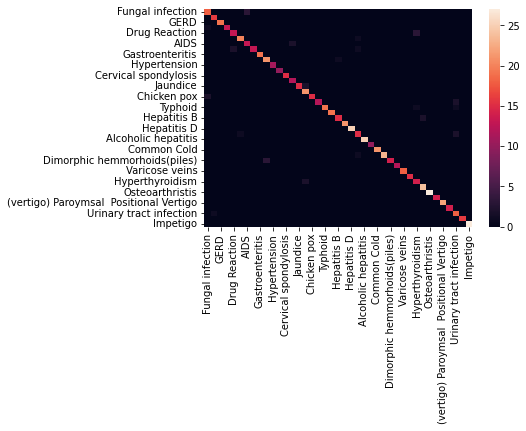

In [7]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [8]:
symptom_list = df1['Symptom'].unique()
symptom_list

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [9]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [12]:
def predict_disease(symptom):
    new_data = []
    for i in range(len(data[0])):
        if d.columns[i] in symptom:
            #vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
#             print(df1[df1['Symptom'] == symptom[i]]['weight'].values[0])
            new_data.append(df1[df1['Symptom'] == symptom[i]]['weight'].values[0])
        else:
            new_data.append(0)
    disease = model.predict([new_data])[0]
    return disease
    

In [13]:
symptom = ['itching', 'skin_rash', 'nodal_skin_eruptions']
# df1[df1['Symptom'] == symptom[0]]['weight'].values[0]
disease = predict_disease(symptom)
print(disease)

Acne


In [15]:
pickle.dump(data, open('data.model', 'wb'))

In [16]:
pickle.dump(d.to_dict, open('d.pkl', 'wb'))